In [2]:
import globals as gl
from main import main
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable


Base directory found: /Volumes/diedrichsen_data$/data/SensoriMotorPrediction/
Base directory: /Volumes/diedrichsen_data$/data/SensoriMotorPrediction/


## **HRF** 

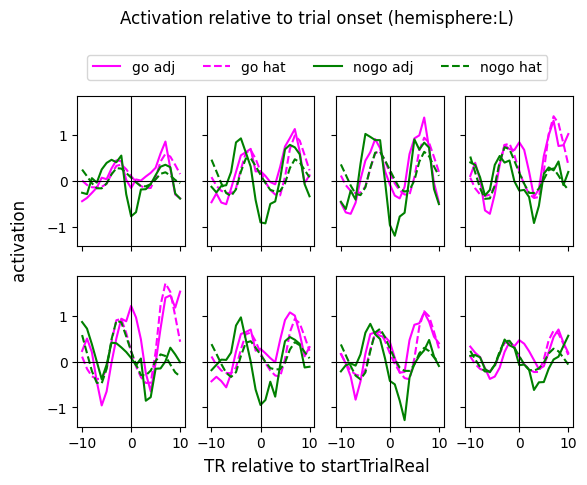

In [4]:
experiment = 'smp2'
Hem = 'L'
roi = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
r = 0
fig, axs = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True)
for i in range(2):
    for j in range(4):
        fig, axs[i, j] = main('PLOT:hrf_roi', experiment, glm=10, roi=roi[r], Hem=Hem, fig=fig, axs=axs[i, j])
        axs[i, j].axhline(0, color='k', ls='-', lw=.8)
        axs[i, j].axvline(0, color='k', ls='-', lw=.8)
        r += 1


handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, .9))
fig.supylabel('activation')
fig.supxlabel('TR relative to startTrialReal')
fig.suptitle(f'Activation relative to trial onset (hemisphere:{Hem})')

fig.subplots_adjust(top=0.8)

# **Activity**

In [1]:
glm = 10
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5, 6))

vmin, vmax = -4, 4

Hem = 'L'
regressor=['0%', '25%', '50%', '75%', '100%']
fig, axs[0, 0] = main('PLOT:flatmap', experiment, glm=glm, Hem=Hem, regressor=regressor, vmin=vmin, vmax=vmax,
                      fig=fig, axs=axs[0, 0], xlim=[-80, 120], ylim=[-50, 150])

Hem = 'R'
fig, axs[0, 1] = main('PLOT:flatmap', experiment, glm=glm, Hem=Hem, regressor=regressor, vmin=vmin, vmax=vmax,
                      fig=fig, axs=axs[0, 1], xlim=[-120, 80], ylim=[-60, 140])
 
Hem = 'L'
regressor=['0%,index', '25%,index', '50%,index', '75%,index', '100%,index', '0%,ring', '25%,ring', '50%,ring', '75%,ring', '100%,ring']
fig, axs[1, 0] = main('PLOT:flatmap', experiment, glm=glm, Hem=Hem, vmin=vmin, vmax=vmax, regressor=regressor, 
                      fig=fig, axs=axs[1, 0], xlim=[-80, 120], ylim=[-50, 150])

Hem = 'R'
fig, axs[1, 1] = main('PLOT:flatmap', experiment, glm=glm, Hem=Hem, vmin=vmin, vmax=vmax, regressor=regressor,
                      fig=fig, axs=axs[1, 1], xlim=[-120, 80], ylim=[-60, 140])

# make colorbar
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(norm=norm, cmap='jet')
cbar = fig.colorbar(sm, ax=[axs[1, 0], axs[1, 1]], orientation='horizontal', fraction=0.03)
cbar.set_label('t-value')

# cosmetic
axs[0, 0].set_title('Left hemisphere\nPlanning')
axs[0, 1].set_title('Right hemisphere\nPlanning')
axs[1, 0].set_title('Execution')
axs[1, 1].set_title('Execution')

fig.suptitle('Average activity during planning and execution')
fig.subplots_adjust(top=0.85, bottom=.2)


NameError: name 'plt' is not defined